In [26]:
import pandas as pd #Data wrangling
import numpy as np #Numerical computation
import matplotlib.pyplot as plt # imports plotting package
%matplotlib inline
import matplotlib as mpl #add plotting functionalities

mpl.rcParams["figure.dpi"] = 300 #high resolution figures. dpi = dots per inch
# import graphviz  

In [27]:
newFrame = pd.read_csv('CaseStudyFile/cleanedFrame_2.csv')

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

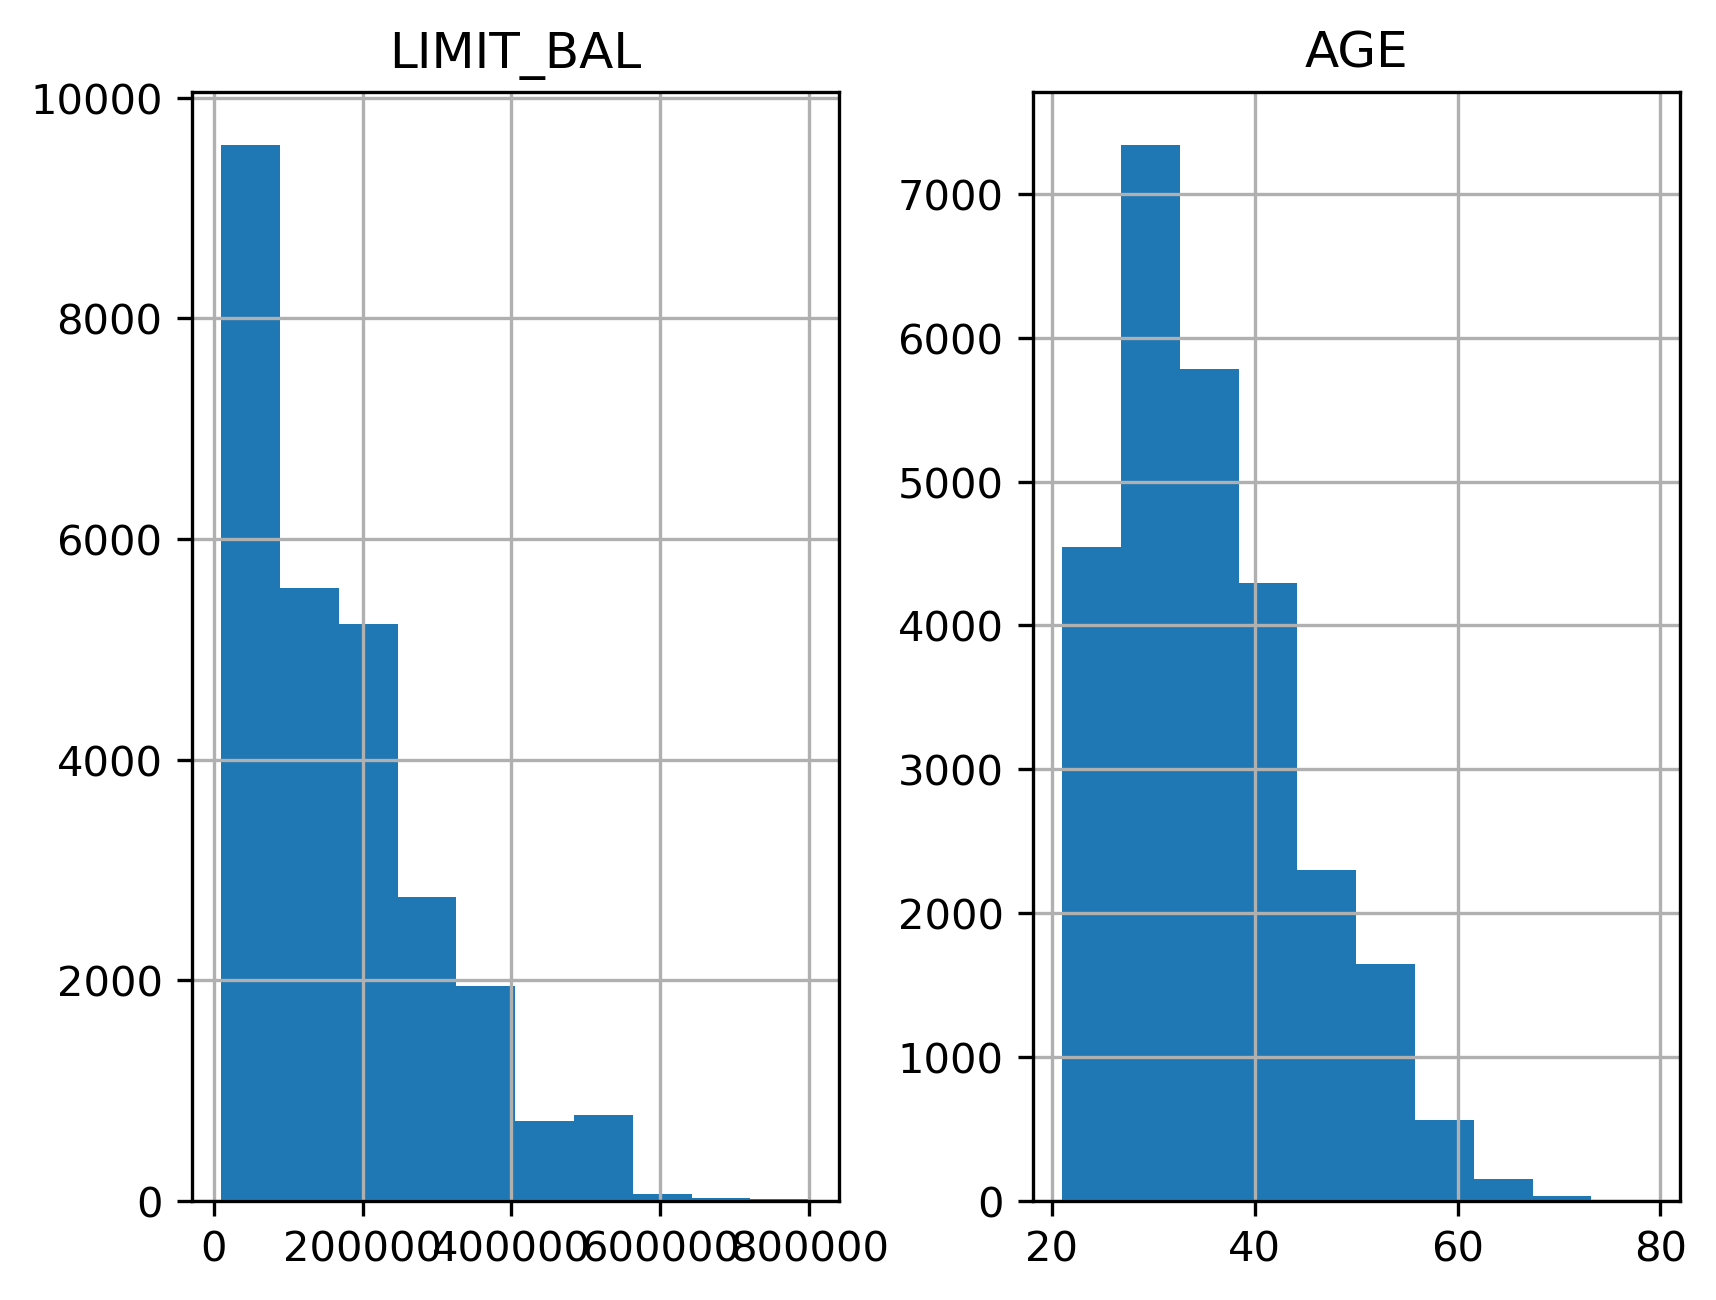

In [28]:
newFrame[["LIMIT_BAL", "AGE"]].hist()

In [29]:
newFrame[["LIMIT_BAL", "AGE"]].describe() # provides summary statistics for the columns

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [30]:
newFrame["EDUCATION"].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [31]:
# lump the lump the undocumented education levels into the other level.
newFrame["EDUCATION"].replace(to_replace = [0, 5, 6], value = 4, inplace = True)
newFrame["EDUCATION"].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [32]:
newFrame["MARRIAGE"].replace(to_replace = 0, value = 3, inplace = True)
newFrame["MARRIAGE"].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

Text(0.5, 0, 'Education level:ordinal encoding')

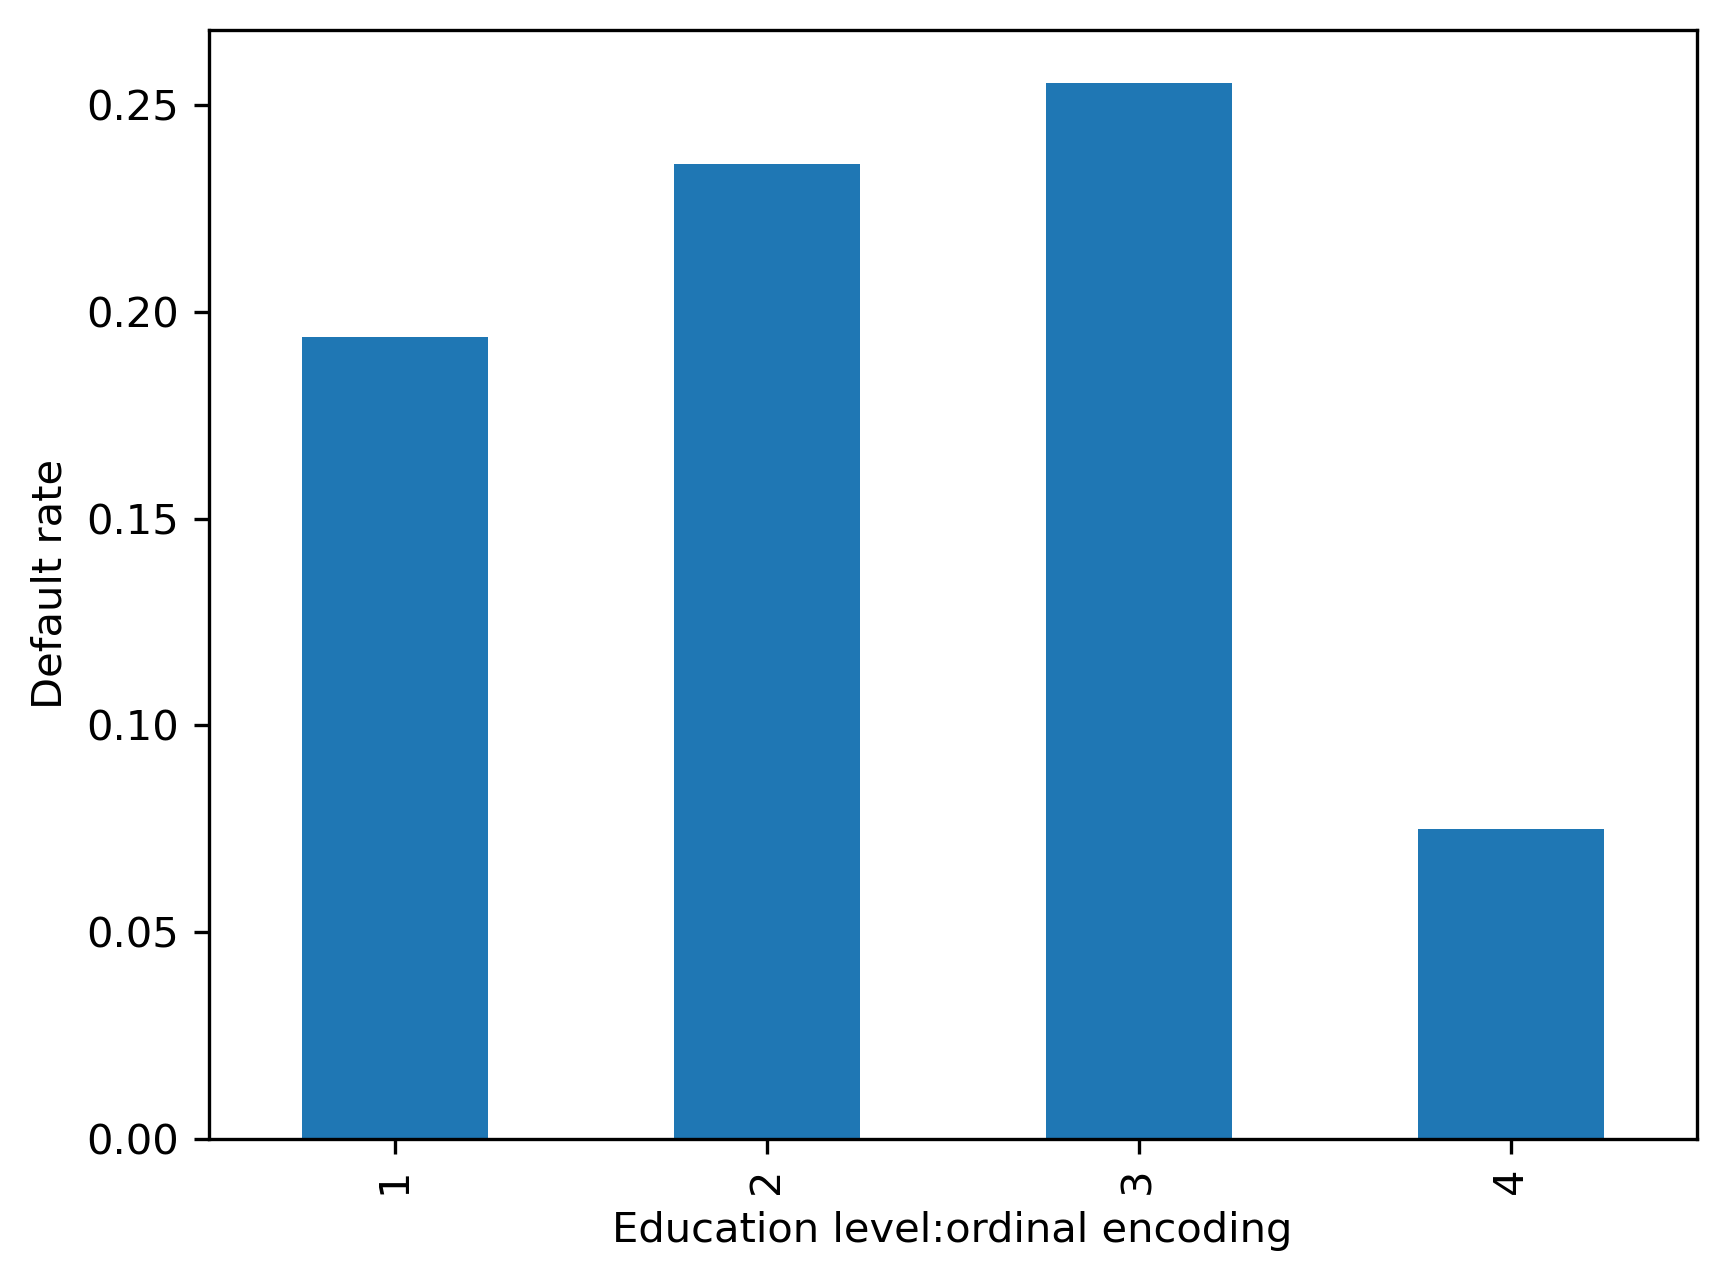

In [33]:
newFrame.to_csv('CaseStudyFile/cleanedData01.csv', index = False)
newFrame = pd.read_csv('CaseStudyFile/cleanedData01.csv')
newFrame.groupby("EDUCATION").agg({'default payment next month':'mean'}).plot.bar(legend = False)
plt.ylabel('Default rate')
plt.xlabel('Education level:ordinal encoding')


In [34]:
# Introducing OHE for the ordinal categorical feature
newFrame["EDUCATION_CAT"] = "none"
newFrame[["EDUCATION", "EDUCATION_CAT"]].head(5)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none


In [35]:
'''Mapping the the new column with the appropriate strings'''
cat_mapping = {1:"graduate school", 2:"university", 3:"high school", 4:"others"}
# Do the mapping
newFrame["EDUCATION_CAT"] = newFrame["EDUCATION"].map(cat_mapping)
newFrame[["EDUCATION", "EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [36]:
# Do OHE
edu_ohe = pd.get_dummies(newFrame["EDUCATION_CAT"])
edu_ohe.head(10)


,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [37]:
"""Concatenate both data frames(the origina and the new one-hot encoded dataframe)"""
dataFrameWithOhe = pd.concat([newFrame, edu_ohe], axis = 1)
dataFrameWithOhe[["EDUCATION_CAT", "graduate school", "high school", "university", "others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,True,False
8,high school,False,True,False,False
9,high school,False,True,False,False


In [38]:
dataFrameWithOhe.to_csv('CaseStudyFile/Chapter_1_cleaned_data.csv', index = False)